<a href="https://colab.research.google.com/github/myrnitax/data_analysis/blob/main/disney_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## step 1: Import Libraries

In [ ]:
import pandas as pd
from textblob import TextBlob  # For sentiment analysis
import matplotlib.pyplot as plt

## Step 2: Load and Explore the Dataset

In [ ]:
archivo_csv = "./DisneylandReviews.csv"
data_frame = pd.read_csv(archivo_csv, encoding='ISO-8859-1')

# Display the first few rows of the dataset
data_frame.head()


,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


## Step 3: Perform sentiment analysis on the review text

In [ ]:
def get_sentiment(text):
    analysis = TextBlob(text)
    # Assign sentiment polarity: negative < 0, neutral = 0, positive > 0
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'


## Step 4: Apply sentiment analysis to the 'Review_Text' column

In [ ]:
data_frame['Sentiment'] = data_frame['Review_Text'].apply(get_sentiment)

## Step 5: Convert 'Year_Month' column to datetime format and group data by Branch and Sentiment


In [ ]:
# Remove rows with "missing" value in 'Year_Month' column
data_frame = data_frame[data_frame['Year_Month'] != 'missing']

# Convert 'Year_Month' column to datetime
data_frame['Year_Month'] = pd.to_datetime(data_frame['Year_Month'])

# Extract year from 'Year_Month' and create a new column 'Year'
data_frame['Year'] = data_frame['Year_Month'].dt.year

# Apply sentiment analysis to the 'Review_Text' column
data_frame['Sentiment'] = data_frame['Review_Text'].apply(get_sentiment)

# Group data by 'Branch' and 'Sentiment' columns and count the occurrences
sentiment_by_branch = data_frame.groupby(['Branch', 'Sentiment']).size().unstack()


## Step 6: Group data by 'Year_Month' and 'Sentiment' columns and count the occurrences


In [ ]:
sentiment_by_year = data_frame.groupby(['Year', 'Sentiment']).size().unstack()

## Step 7: Plotting

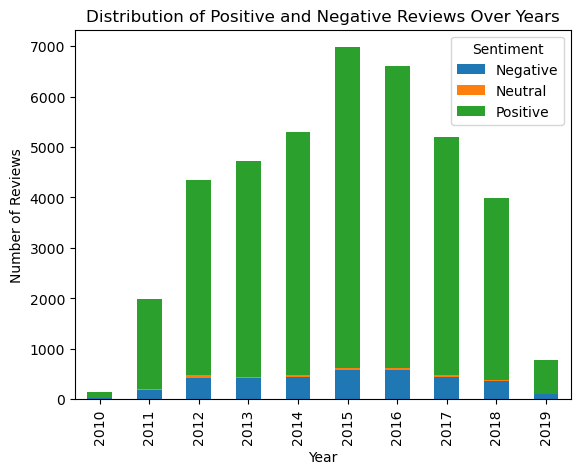

In [ ]:
sentiment_by_year.plot(kind='bar', stacked=True)
plt.title('Distribution of Positive and Negative Reviews Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.show()

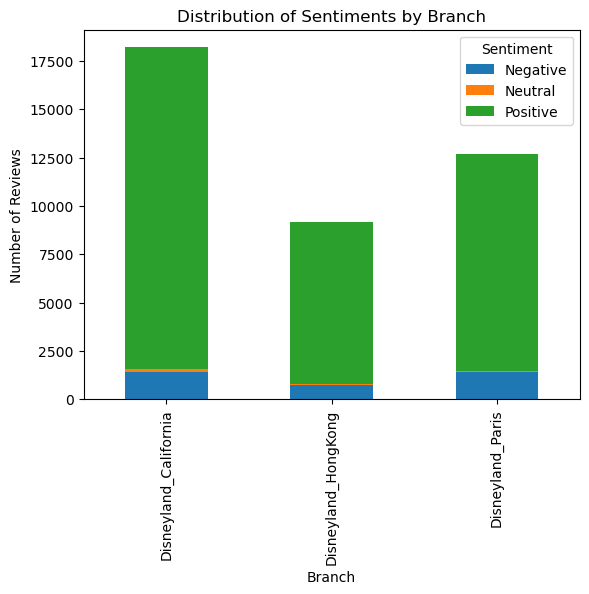

In [ ]:
sentiment_by_branch.plot(kind='bar', stacked=True)
plt.title('Distribution of Sentiments by Branch')
plt.xlabel('Branch')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.show()